# Example code

In [ ]:
import os
import numpy as np
import scipy.io
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import sys
import tifffile as tiff
import cv2
import time

## Functions

### check_duplicates

In [ ]:
# check duplicate elemennts in a list of np arrays
def check_duplicates(arrays): # input is a list of np arrays
    flattened_array = np.concatenate(arrays)
    unique_elements, counts = np.unique(flattened_array, return_counts=True)
    duplicate_elements = unique_elements[counts > 1]

    if len(duplicate_elements) > 0:
        print("Duplicate numbers found:", duplicate_elements)
        return duplicate_elements
    else:
        print("No duplicate numbers found.")
        return None

# example of using the function
arrays = [
    np.array([36, 52, 69, 71, 74, 88, 115]),
    np.array([18, 19, 20, 21, 22, 23, 24, 25, 74]),
]
duplicate_numbers = check_duplicates(arrays)

Duplicate numbers found: [74]


### adjustable_sigmoid

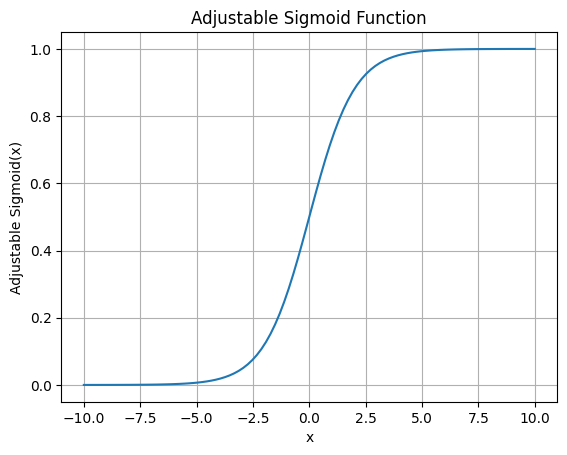

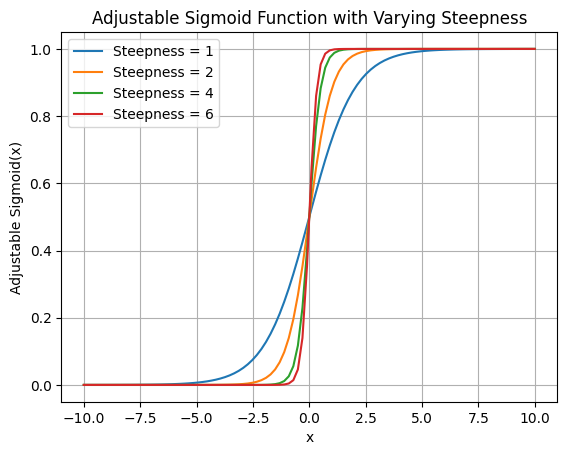

In [ ]:
def adjustable_sigmoid(x, steepness):
    return 1 / (1 + np.exp(-x * steepness))

# Example usage 1
x = np.linspace(-10, 10, 100)  # Generate 100 points between -10 and 10
steepness = 1  # Set the steepness parameter
y = adjustable_sigmoid(x, steepness)

# Plot the adjustable sigmoid curve
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Adjustable Sigmoid(x)')
plt.title('Adjustable Sigmoid Function')
plt.grid(True)
plt.show()

# Example usage 2
x = np.linspace(-10, 10, 100)  # Generate 100 points between -10 and 10
steepness_values = [1, 2, 4, 6]  # Set the steepness parameter values

# Plotting multiple figures on one plot
plt.figure()

# Iterate through each steepness value
for steepness in steepness_values:
    y = adjustable_sigmoid(x, steepness)
    label = f"Steepness = {steepness}"
    plt.plot(x, y, label=label)

plt.xlabel('x')
plt.ylabel('Adjustable Sigmoid(x)')
plt.title('Adjustable Sigmoid Function with Varying Steepness')
plt.legend()
plt.grid(True)
plt.show()

## Integral of exponential, alpha, and double-exponential kernels

In [ ]:
# analytical results
from sympy import symbols, exp, integrate, oo

# Define the symbols and parameters
t, tau, tau1, tau2 = symbols('t tau tau1 tau2')

# Define the functions
f1 = t/tau * exp(1 - t/tau)
f2 = exp(-t/tau)
f3 = exp(-t/tau1) - exp(-t/tau2)

# Calculate the integrals
result1 = integrate(f1, (t, 0, oo))
result2 = integrate(f2, (t, 0, oo))
result3 = integrate(f3, (t, 0, oo))

# Print the results
print("Integral of (t/tau) * exp(1 - t/tau) from t=0 to infinity:")
print(result1)
print("\nIntegral of exp(-t/tau) from t=0 to infinity:")
print(result2)
print("\nIntegral of exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:")
print(result3)

Integral of (t/tau) * exp(1 - t/tau) from t=0 to infinity:
Piecewise((E*tau, Abs(arg(tau)) < pi/2), (Integral(t*exp(-t/tau + 1)/tau, (t, 0, oo)), True))

Integral of exp(-t/tau) from t=0 to infinity:
Piecewise((tau, Abs(arg(tau)) < pi/2), (Integral(exp(-t/tau), (t, 0, oo)), True))

Integral of exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:
Piecewise((tau1 - tau2, (Abs(arg(tau1)) < pi/2) & (Abs(arg(tau2)) < pi/2)), (Integral(-exp(-t/tau2) + exp(-t/tau1), (t, 0, oo)), True))


The output you're seeing is due to the way SymPy handles complex numbers and the conditions for convergence of the integral.

The `Piecewise` function is used to define a function that behaves differently depending on the input. In this case, it's saying that the integral equals `E*tau` or `tau` when the absolute value of the argument of `tau` is less than `pi/2`, and otherwise it's equal to the unevaluated integral.

The `arg` function returns the argument (also known as the phase) of a complex number. The argument of a complex number is the angle it makes with the positive real axis in the complex plane. The condition `Abs(arg(tau)) < pi/2` is essentially checking if `tau` is a positive real number. If `tau` is a positive real number, then its argument is 0, which is less than `pi/2`.

In [ ]:
# numerical results
from sympy import symbols, exp, integrate, oo

# Define the symbols and parameters
t, tau, tau1, tau2 = symbols('t tau tau1 tau2')

# Define the functions
f1 = t/tau * exp(1 - t/tau)
f2 = exp(-t/tau)
f3 = exp(-t/tau1) - exp(-t/tau2)

# Calculate the integrals
result1 = integrate(f1, (t, 0, oo)).subs(tau, 2)  # Example value: tau = 2
result2 = integrate(f2, (t, 0, oo)).subs(tau, 3)  # Example value: tau = 3
result3 = integrate(f3, (t, 0, oo)).subs({tau1: 5, tau2: 2})

# Evaluate the numerical results
num_result1 = result1.evalf()
num_result2 = result2.evalf()
num_result3 = result3.evalf()

# Print the numerical results
print("Numerical result of integral (t/tau) * exp(1 - t/tau) from t=0 to infinity:")
print(num_result1)
print("\nNumerical result of integral exp(-t/tau) from t=0 to infinity:")
print(num_result2)
print("\nNumerical result of integral exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:")
print(num_result3)

Numerical result of integral (t/tau) * exp(1 - t/tau) from t=0 to infinity:
5.43656365691809

Numerical result of integral exp(-t/tau) from t=0 to infinity:
3.00000000000000

Numerical result of integral exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:
3.00000000000000


In [ ]:
# normalize f1, f2 and f3 and recalculate the numerical results
# for any tau value, the results are 1.

# Define the functions
f1 = t/tau * exp(1 - t/tau) / (exp(1) * tau)
f2 = exp(-t/tau) / tau
f3 = (exp(-t/tau1) - exp(-t/tau2)) / (tau1 - tau2)

# Calculate the integrals
result1 = integrate(f1, (t, 0, oo)).subs(tau, 5)
result2 = integrate(f2, (t, 0, oo)).subs(tau, 8)
result3 = integrate(f3, (t, 0, oo)).subs({tau1: 5, tau2: 2})

# Evaluate the numerical results
num_result1 = result1.evalf()
num_result2 = result2.evalf()
num_result3 = result3.evalf()

# Print the numerical results
print("Numerical result of integral (t/tau) * exp(1 - t/tau) from t=0 to infinity:")
print(num_result1)
print("\nNumerical result of integral exp(-t/tau) from t=0 to infinity:")
print(num_result2)
print("\nNumerical result of integral exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:")
print(num_result3)

Numerical result of integral (t/tau) * exp(1 - t/tau) from t=0 to infinity:
1.00000000000000

Numerical result of integral exp(-t/tau) from t=0 to infinity:
1.00000000000000

Numerical result of integral exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:
1.00000000000000


## Curves of exponential, alpha, and double-exponential kernels

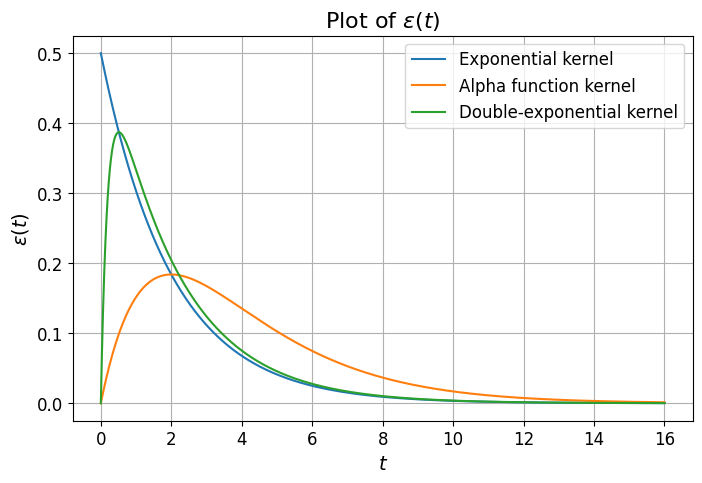

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation of Exponential kernel
def epsilon1(t, tau):
    return np.heaviside(t, 0) * (1 / tau) * np.exp(-t / tau)
    # np.heaviside(0, 0) = 0.0

# Define the equations of Alpha function kernel
def epsilon2(t, tau): #
    return np.heaviside(t, 0) * (t / (np.e * tau**2)) * np.exp(1 - (t / tau))

# Define the equations of Double-exponential kernel
def epsilon3(t, tau_decay, tau_rise):
    return (np.heaviside(t, 0) * (1 / (tau_decay - tau_rise)) *
            (np.exp(-t / tau_decay) - np.exp(-t / tau_rise)))

# Define the time range
infinitesimal = np.finfo(float).eps
t = np.linspace(infinitesimal, 16, 1000)

# Calculate the values of epsilon
tau = 2
epsilon1_values = epsilon1(t, tau) # Exponential kernel
tau = 2
epsilon2_values = epsilon2(t, tau) # Alpha function kernel
tau_decay = 2
tau_rise = 0.2
epsilon3_values = epsilon3(t, tau_decay, tau_rise) # Double-exponential kernel

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(t, epsilon1_values, label='Exponential kernel')
plt.plot(t, epsilon2_values, label='Alpha function kernel')
plt.plot(t, epsilon3_values, label='Double-exponential kernel')
plt.xlabel('$t$', fontsize=14)  # Adjust x-axis label font size
plt.ylabel('$\epsilon(t)$', fontsize=14)  # Adjust y-axis label font size
plt.title('Plot of $\epsilon(t)$', fontsize=16)  # Adjust title font size
plt.legend(fontsize=12)  # Adjust legend font size
plt.grid(True)
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.show()

## Power-law funcs/curves

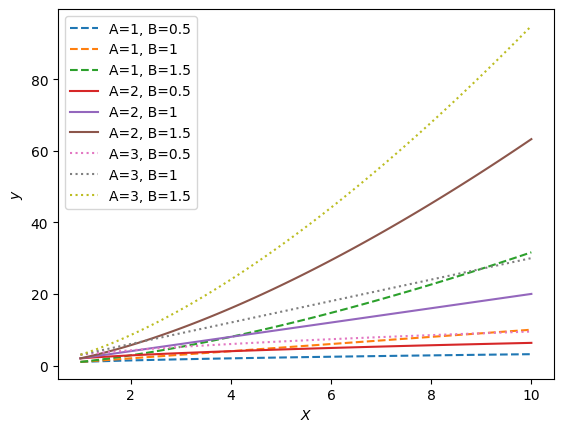

In [ ]:
# Define the equation
def func(X, A, B):
    return A * X**B

# Generate x values
X = np.linspace(1, 10, 100)

# Set different values of A and B
A_values = [1, 2, 3]
B_values = [0.5, 1, 1.5]

# Define line styles for different A values
line_styles = ['--', '-', ':']

# Plot the curves for different A and B values
for i, A in enumerate(A_values):
    for B in B_values:
        y = func(X, A, B)
        label = f'A={A}, B={B}'
        line_style = line_styles[i % len(line_styles)]  # Cycle through line styles
        plt.plot(X, y, line_style, label=label)

# Add labels and legend
plt.xlabel(r'$X$')
plt.ylabel(r'$y$')
plt.legend()

# Show the plot
plt.show()

## Find indices for given value in a array

In [ ]:
import numpy as np

# Create a NumPy array
y = np.array([10, 20, 25, 30, 25, 40])

# Find the indices where y == 25
indices = np.where(y == 25)

# Print the indices
print(indices)

# Create a 2D NumPy array
y = np.array([[10, 20, 30],
              [40, 25, 60],
              [25, 70, 80]])

# Find the indices where y == 25
indices_1 = np.argwhere(y == 25) # for 2D array, better to use argwhere, in form of [[x1,y1],[x2,y2],...]
indices_2 = np.where(y == 25) # in form of ([x1, x2], [y1, y2],...)

# Print the indices
print(indices_1, type(indices_1))
print(indices_2, type(indices_2))

(array([2, 4]),)
[[1 1]
 [2 0]] <class 'numpy.ndarray'>
(array([1, 2]), array([1, 0])) <class 'tuple'>


## Classify data into intervals (hitogram, np.digitize)

In [ ]:
import numpy as np

# Create an array of values
x = np.array([-1, 1.2, 2.4, 3.6, 4.8, 6.0, 99])

# Define the bin edges
bin_edges = [0, 2, 4, 6, 8]

# Use np.digitize to assign values to bins
bin_indices = np.digitize(x, bin_edges)

# Print the bin indices
print(bin_indices)

[0 1 2 2 3 4 5]


## Reshape and Add new axis

In [ ]:
# use np.reshape

array_1 = np.random.rand(5)
array_1 = array_1.reshape((5, 1))
print(array_1)
print(array_1.shape)

array_1 = np.random.rand(5)
array_1 = array_1.reshape((1, 5, 1, 1))
print(array_1)
print(array_1.shape)

[[0.16318647]
 [0.44824389]
 [0.08251782]
 [0.07820963]
 [0.76290229]]
(5, 1)
[[[[0.10786021]]

  [[0.41077246]]

  [[0.48946718]]

  [[0.37004873]]

  [[0.20728852]]]]
(1, 5, 1, 1)


In [ ]:
# use np.newaxis

array_1 = np.random.rand(2,3)
array_1 = array_1[np.newaxis] # or [np.newaxis,:], [np.newaxis,:,:] (same results)
print(array_1)
print(array_1.shape)

array_1 = np.random.rand(2,3)
array_1 = array_1[:, :, np.newaxis]
print(array_1)
print(array_1.shape)

array_1 = np.random.rand(2,3)
array_1 = array_1[:, np.newaxis] # or [:, np.newaxis,:] (same results)
print(array_1)
print(array_1.shape)

[[[0.93515644 0.03100769 0.83588007]
  [0.85246356 0.42801811 0.09319741]]]
(1, 2, 3)
[[[0.24720431]
  [0.37434429]
  [0.60797408]]

 [[0.34576359]
  [0.64596096]
  [0.65619589]]]
(2, 3, 1)
[[[0.5982185  0.9360176  0.19818809]]

 [[0.18946709 0.27321477 0.23951744]]]
(2, 1, 3)


In [ ]:
# use np.expand_dims

array_1 = np.random.rand(5)
array_1 = np.expand_dims(array_1, axis=1)  # same as array_1d[:, np.newaxis]
print(array_1)
print(array_1.shape)

[[0.77713465]
 [0.40925237]
 [0.48140372]
 [0.53088138]
 [0.51900511]]
(5, 1)


## Calcualting the mean, var, std and covar

In [ ]:
# Sample data
data = np.array([1, 2, 3, 4, 5])

# Calculate the mean
mean = np.mean(data)
print("Mean:", mean)

# Calculate the variance (using n)
variance_n = np.var(data)
print("Variance (n):", variance_n)

# Calculate the variance (using n-1)
variance_n_1 = np.var(data, ddof=1)
print("Variance (n-1):", variance_n_1)

# Calculate the standard deviation (using n)
std_n = np.std(data)
print("Standard Deviation (n):", std_n)

# Calculate the standard deviation (using n-1)
std_n_1 = np.std(data, ddof=1)
print("Standard Deviation (n-1):", std_n_1)

Mean: 3.0
Variance (n): 2.0
Variance (n-1): 2.5
Standard Deviation (n): 1.4142135623730951
Standard Deviation (n-1): 1.5811388300841898


In [ ]:
# Create a 2D array of data with different row and column numbers
data = np.array([[1, 2, 3], [4, 5, 6]]) # m by n matrix, m rows and n columns

# Calculate the covariance matrix with rowvar=False (using n-1)
covariance_matrix_n_1 = np.cov(data, rowvar=False)
# By setting rowvar=False, we indicate that each column represents a variable and each row represents an observation.
# Then the output is n by n (n is the number of columns).
# Otherwise, rowvar=True means each row represents a variable and each column represents an observation.
# Then the output is m by m (m is the number of rows).

# Calculate the covariance matrix with rowvar=False (using n)
covariance_matrix_n = np.cov(data, rowvar=False, bias=True)

# Print the covariance matrix
print("Covariance (n-1):", covariance_matrix_n_1)
print("Covariance (n):", covariance_matrix_n)

Covariance (n-1): [[4.5 4.5 4.5]
 [4.5 4.5 4.5]
 [4.5 4.5 4.5]]
Covariance (n): [[2.25 2.25 2.25]
 [2.25 2.25 2.25]
 [2.25 2.25 2.25]]


## Creating tiff files

In [ ]:
# Create a numpy array with your data
data = np.random.randint(0, 255, size=(512, 512), dtype=np.uint8) # gray image

# Save the numpy array as a TIFF file
tiff.imwrite('output_1.tif', data)

In [ ]:
# Create a numpy array with your 3D data
data = np.random.randint(0, 255, size=(3, 512, 512), dtype=np.uint8) # rgb image

# Save the numpy array as a 3D TIFF file
tiff.imwrite('output_2.tif', data)

In [ ]:
# Create a numpy array with your 3D float data
data = np.random.rand(2, 512, 512) * 100.0  # Example: random float values between 0 and 100

# Save the numpy array as a 3D TIFF file
tiff.imwrite('output_3.tif', data)

## Logistic regression details


[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

For `sklearn.linear_model.LogisticRegression`, there is an argument called `multi-class` (see official description below), which determines the method used for multi-classification.

> multi_class{'auto', 'ovr', 'multinomial'}, default='auto'
If the option chosen is 'ovr', then a binary problem is fit for each label. For 'multinomial' the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. 'multinomial' is unavailable when solver='liblinear'. 'auto' selects 'ovr' if the data is binary, or if solver='liblinear', and otherwise selects 'multinomial'.

**OvR**

In logistic regression, the "One-vs-Rest" (OvR) approach is a common strategy **for handling multi-class classification problems**. In this approach, multiple binary logistic regression models are trained, each one considering one class as the positive class and the rest of the classes as the negative class.

After calculating the sigmoid probabilities for each class in the OvR approach, you can normalize the probabilities to ensure that their sum is equal to 1 (that's what `sklearn.linear_model.LogisticRegression` does for multi-class). Here's how you can do it:

1. Calculate the sigmoid probabilities for each class using the logistic regression model.

  The key point of logistic regression is that **we model the log of the odds ($O =\frac{p}{1-p}$) as linear**. This is called logistic regression.

  $$
  \eta=\mathrm{logit}(p)=\mathrm{log}\left(\frac{p}{1-p}\right)
  $$

  $$
  p= \mathrm{expit}(\eta)=\frac{e^\eta}{e^\eta+1}= \frac{1}{1+e^{-\eta}}
  $$

  where logit and expit are inverse functions of each other. The logit function maps probabilities (values between 0 and 1) to real numbers (values between negative infinity and positive infinity). The expit function is a sigmoid function that maps any real-valued number to the range of 0 to 1.

  For class $i$ and data $\boldsymbol{X}$, $\eta$ is considered as a linear combination (if we set intercept is True, then we have $\beta_{i,0}$) as follows.

  $$
  \begin{array}{l}
  \eta_i(\boldsymbol{X})&=\mathrm{logit}\left\{P(Y=y_i\mid \boldsymbol{X})\right\}\\
  &=\mathrm{logit}\left\{P(Y=y_i\mid X_1,X_2,\dots,X_N)\right\}\\
  &=\beta_{i,0}+\beta_{i,1}X_1+\beta_{i,2}X_2+\dots+\beta_{i,N}X_N
  \end{array}
  $$

  All $\beta_{i,n}$ forms an $I$ (number of classes) by $N$ (input length, i.e., the number of features) matrix, resulting in a 2D matrix of probabilities for each class and each piece of input data.

2. Normalize the probabilities by dividing each probability by the sum of all probabilities (for each piece of data $\boldsymbol{X}$):

   normalized_probs = probabilities / sum(probabilities)

   This step ensures that the sum of the probabilities for all classes is equal to 1.

Note that this normalization step is necessary because the sigmoid probabilities for each class are calculated independently, treating each class as a separate binary classification problem. Normalizing the probabilities ensures that they represent a valid probability distribution across all classes.

**Multinomial**

Multinomial Logistic Regression, also known as Softmax Regression, is an extension of logistic regression that is used for multi-class classification problems. It allows for the prediction of probabilities across multiple mutually exclusive classes.

In multinomial logistic regression, the goal is to model the relationship between the predictor variables and the probabilities of each class. Instead of modeling binary outcomes, it deals with multiple classes. The model estimates the probabilities of each class and assigns the observation to the class with the highest probability.

The mathematical formulation of multinomial logistic regression involves the use of the softmax function. Given a set of predictor variables and their corresponding weights, the softmax function calculates the probabilities for each class.

Mathematically, the softmax function is defined as:

$$
p_i= \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

where $p_i = P(Y=y_i\mid \boldsymbol{X}) = P(Y=y_i\mid X_1,X_2,\dots,X_N)$ is the pribability of class $i$. In OvR, we model $\eta$ as linear; here we model $z$ as linear. $z_i = \beta_{i,0}+\beta_{i,1}X_1+\beta_{i,2}X_2+\dots+\beta_{i,N}X_N$ is is the linear combination of the predictor variables (if we set intercept is True, then we have $\beta_{i,0}$) and their corresponding weights for class $i$, and the sum is taken over all classes $j$.

To fit a multinomial logistic regression model, the weights or coefficients are estimated using maximum likelihood estimation or other optimization algorithms. The objective is to find the values of the weights that maximize the likelihood of observing the training data given the model.

Note that softmax function naturally guarantees that the sum of probabilities of all classes is 1, so no nomrmalization is needed. But OvR needs normalization for 3 or more classes (see the following for special case: binary classification).

**Special case: binary classification**

Note that for specaial case -- binary classification: in binary classification, ovr can guarantee that the sum of probabilities of 2 classes is 1 (it is to some extent intuitive. Mathematical proof should be easy).

Note that, differnet from multi-calss classification, in binary classification (the target array only contains two differnt classes, like 0 and 1), `sklearn.linear_model.LogisticRegression` no longer gives the coefficients and intercepts for all classes, but only gives the coefficients and intercepts for class 1. But we can swap the class (0 → 1, 1 → 0) to get the coefficients and intercepts for the other class.

See code and comments in code for more details.

> `classes_: ndarray of shape (n_classes, )`
>
> A list of class labels known to the classifier.
>
> `coef_: ndarray of shape (1, n_features) or (n_classes, n_features)`
>
> Coefficient of the features in the decision function.
>
> coef_ is of shape (1, n_features) when the given problem is binary. In particular, when multi_class='multinomial', coef_ corresponds to outcome 1 (True) and -coef_ corresponds to outcome 0 (False).
>
> `intercept: _ndarray of shape (1,) or (n_classes,)`
>
> Intercept (a.k.a. bias) added to the decision function.
>
> If fit_intercept is set to False, the intercept is set to zero. intercept_ is of shape (1,) when the given problem is binary. In particular, when multi_class='multinomial', intercept_ corresponds to outcome 1 (True) and -intercept_ corresponds to outcome 0 (False).
>
> `n_features_in_: int`
>
> Number of features seen during fit.

### Generate data

In [ ]:
# generate random data for rergession

import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples and features
num_samples_train = 200
num_samples_test = 6
num_features = 5

# Generate random input features for training and testing data
x_train = np.random.randn(num_samples_train, num_features)
x_test = np.random.randn(num_samples_test, num_features)

# Generate random binary labels for training and testing data
y_train_binary = np.random.randint(0, 2, size=num_samples_train)
y_test_binary = np.random.randint(0, 2, size=num_samples_test)
y_train_binary_swapped = 1 - y_train_binary # for testing prob sum is 1 for OvR binary classification and the probs are same as multinomial
y_test_binary_swapped = 1 - y_test_binary

y_train_multiclass = np.random.randint(0, 4, size=num_samples_train)
y_test_multiclass = np.random.randint(0, 4, size=num_samples_test)

### Multinomial multi-class classification (3 or more classes)

In [ ]:
# 3 or more classes (multi-class classification)
# fit using multi_class='multinomial'.

# 1. we can see the the predicted probabilities ('y_prob.T') are same as 'softmax_result_linear'.
# So, the input to the softmax is the linear combination but not the output of logit funcstions.
# No logit funcstion is used in 'multinomial'. If we input the output of logit funcstions to softmax, the result is
# 'softmax_result_logits', which shows more even distribution because the input (output of logit function) is in a
# small interval [0, 1].

# 2. the output shape of coefficients is I by N: I is the number of classes, and N is the number of features

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
fit_result = model.fit(x_train, y_train_multiclass)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(model.coef_, x_test.T) + fit_result.intercept_[:, np.newaxis] # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_multiclass)
print(y_pred.shape, y_test_multiclass.shape)

Intercept shape: (4,) Coefficients shape: (4, 5)
Coefficients: [-0.02690423  0.12363447  0.01597261  0.01060562  0.18336131]
Intercept: 0.10900482538504756
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.3304651  0.26423911 0.3688098  0.27064204 0.34158595 0.22744391]
 [0.27531937 0.38650995 0.24046665 0.19114155 0.20773003 0.317364  ]
 [0.17298192 0.22327799 0.14456644 0.2680026  0.30203264 0.26397038]
 [0.22123361 0.12597295 0.24615712 0.27021381 0.14865139 0.19122171]]
$$$$$$$$$$$$$
result:
 [[0.57634604 0.53300947 0.60876839 0.52243285 0.58979184 0.48072151]
 [0.53126466 0.62540018 0.50360956 0.43585759 0.46648655 0.56365115]
 [0.41592542 0.49094934 0.37885671 0.51998717 0.55972368 0.51793756]
 [0.47664437 0.35238843 0.50945565 0.52203775 0.38487888 0.43767033]]
$$$$$$$$$$$$$
result_normalize:
 [[0.28814702 0.26627209 0.30427917 0.26117524 0.29476608 0.24036309]
 [0.26560836 0.31242712 0.2517179  0.21789444 0.23314058 0.28182832]
 [0.20794394 0.24526038 0.189363   0.2599526  0.27973862 0.

### OvR multi-class classification (3 or more classes)

In [ ]:
# 3 or more classes (multi-class classification)
# fit using multi_class='ovr'.

# 1. we can see the the predicted probabilities ('y_prob.T') are same as 'result_normalize'.
# So, normalization is necessary for OvR logistic regression.

# 2. the output shape of coefficients is I by N: I is the number of classes, and N is the number of features

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')
fit_result = model.fit(x_train, y_train_multiclass)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(model.coef_, x_test.T) + fit_result.intercept_[:, np.newaxis] # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_multiclass)
print(y_pred.shape, y_test_multiclass.shape)

Intercept shape: (4,) Coefficients shape: (4, 5)
Coefficients: [-0.02839059  0.15257944  0.01812457  0.00269251  0.24462486]
Intercept: -1.0037010775150204
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.329005   0.26793515 0.36606798 0.27087988 0.34087975 0.2254274 ]
 [0.27666902 0.37889351 0.24325164 0.19052176 0.2075264  0.3171024 ]
 [0.16919533 0.22608803 0.13900234 0.26783833 0.3024563  0.26319361]
 [0.22513065 0.12708331 0.25167803 0.27076004 0.14913755 0.19427659]]
$$$$$$$$$$$$$
result:
 [[0.32471042 0.26994966 0.36574016 0.26608369 0.33667369 0.22154886]
 [0.27305759 0.38174228 0.24303381 0.18714839 0.20496577 0.31164657]
 [0.16698679 0.22778791 0.13887786 0.263096   0.29872435 0.25866529]
 [0.22219197 0.1280388  0.25145265 0.26596598 0.14729737 0.19093401]]
$$$$$$$$$$$$$
result_normalize:
 [[0.329005   0.26793515 0.36606798 0.27087988 0.34087975 0.2254274 ]
 [0.27666902 0.37889351 0.24325164 0.19052176 0.2075264  0.3171024 ]
 [0.16919533 0.22608803 0.13900234 0.26783833 0.3024563  0.

### Multinomial binary classification

In [ ]:
# 2 classes (binary classification)
# fit using multi_class='multinomial'.

# 1. The output shape of coefficients becomes 1 by N but not 2 by N.
# softmax_result_logits, softmax_result_linear, result_normalize all becomes arrays with all elements being 1,
# because the dimension of vertical axis becomes 1 (lack of coefficients of class 0).
# That is, the model no longer gives the coefficients for class 0,
# but directly uses 1 - P(class 1) as the probability of class 0.

# SO, WE NEED TO check whether the probability of class 0 is exactly equal to 1 - P(class).
# We use y_train_binary_swapped and y_test_binary_swapped do the regression again in the next chunk.
# ALso, in the next chunk, we combine the two coefficients and two intercepts to calculate softmax_result_logits, softmax_result_linear, result_normalize.

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
fit_result = model.fit(x_train, y_train_binary)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

coeffi =  model.coef_ # record the coefficient to combine it with the coefficients in next chunk
intercept =  model.intercept_ # record the intercept to combine it with the coefficients in next chunk

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(model.coef_, x_test.T) + fit_result.intercept_[:, np.newaxis] # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_binary)
print(y_pred.shape, y_test_binary.shape)

Intercept shape: (1,) Coefficients shape: (1, 5)
Coefficients: [-0.12008008  0.17210147 -0.04720982  0.09785444  0.03054086]
Intercept: 0.023175838709870764
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.51525751 0.40788362 0.60511154 0.55391366 0.43772495 0.49977283]
 [0.48474249 0.59211638 0.39488846 0.44608634 0.56227505 0.50022717]]
$$$$$$$$$$$$$
result:
 [[0.49236947 0.54645579 0.44685037 0.47296436 0.53125923 0.50011359]]
$$$$$$$$$$$$$
result_normalize:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
softmax_result_linear:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
softmax_result_logits:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
||||---||||||||||||||||---||||
$$$$$$$$$$$$$
sum of y_prob.T:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of result:
 [0.49236947 0.54645579 0.44685037 0.47296436 0.53125923 0.50011359]
$$$$$$$$$$$$$
sum of result_normalize:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of softmax_result_linear:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of softmax_result_logits:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$


In [ ]:
# 2 classes (binary classification)
# fit using multi_class='multinomial' (y_train_binary_swapped and y_test_binary_swapped).

# 1. We use y_train_binary_swapped do the regression again  and stack the coefficients and intercept with the ones from
# the previsous chunk using y_train_binary to get the complete the coefficients and intercepts. Then we calcuate
# softmax_result_logits, softmax_result_linear, result_normalize. Show that softmax_result_linear is same as the y_prob.

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
fit_result = model.fit(x_train, y_train_binary_swapped)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(np.vstack((coeffi, model.coef_)), x_test.T) + np.vstack((intercept[:, np.newaxis],
                fit_result.intercept_[:, np.newaxis])) # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_binary_swapped)
print(y_pred.shape, y_test_binary_swapped.shape)

Intercept shape: (1,) Coefficients shape: (1, 5)
Coefficients: [ 0.12008008 -0.17210147  0.04720982 -0.09785444 -0.03054086]
Intercept: -0.023175838709870653
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.48474249 0.59211638 0.39488846 0.44608634 0.56227505 0.50022717]
 [0.51525751 0.40788362 0.60511154 0.55391366 0.43772495 0.49977283]]
$$$$$$$$$$$$$
result:
 [[0.49236947 0.54645579 0.44685037 0.47296436 0.53125923 0.50011359]
 [0.50763053 0.45354421 0.55314963 0.52703564 0.46874077 0.49988641]]
$$$$$$$$$$$$$
result_normalize:
 [[0.49236947 0.54645579 0.44685037 0.47296436 0.53125923 0.50011359]
 [0.50763053 0.45354421 0.55314963 0.52703564 0.46874077 0.49988641]]
$$$$$$$$$$$$$
softmax_result_linear:
 [[0.48474249 0.59211638 0.39488846 0.44608634 0.56227505 0.50022717]
 [0.51525751 0.40788362 0.60511154 0.55391366 0.43772495 0.49977283]]
$$$$$$$$$$$$$
softmax_result_logits:
 [[0.49618481 0.5232112  0.47345018 0.48648547 0.51562452 0.50005679]
 [0.50381519 0.4767888  0.52654982 0.51351453 0.

### OvR binary classification

In [ ]:
# 2 classes (binary classification)
# fit using multi_class='ovr'.

# 1. The output shape of coefficients becomes 1 by N but not 2 by N.
# softmax_result_logits, softmax_result_linear, result_normalize all becomes arrays with all elements being 1,
# because the dimension of vertical axis becomes 1 (lack of coefficients of class 0).
# That is, the model no longer gives the coefficients for class 0,
# but directly uses 1 - P(class 1) as the probability of class 0.

# 2. 'result' is same as 'y_prob' (second row, class 1).

# SO, WE NEED TO check whether the probability of class 0 is exactly equal to 1 - P(class).
# We use y_train_binary_swapped and y_test_binary_swapped do the regression again in the next chunk.
# ALso, in the next chunk, we combine the two coefficients and two intercepts to calculate softmax_result_logits, softmax_result_linear, result_normalize.

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')
fit_result = model.fit(x_train, y_train_binary)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

coeffi =  model.coef_ # record the coefficient to combine it with the coefficients in next chunk
intercept =  model.intercept_ # record the intercept to combine it with the coefficients in next chunk

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(model.coef_, x_test.T) + fit_result.intercept_[:, np.newaxis] # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_binary)
print(y_pred.shape, y_test_binary.shape)

Intercept shape: (1,) Coefficients shape: (1, 5)
Coefficients: [-0.23748101  0.34044485 -0.09304119  0.19323541  0.06040668]
Intercept: 0.04654959275815589
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.51483709 0.40872225 0.60358641 0.55316849 0.4384004  0.49963222]
 [0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]]
$$$$$$$$$$$$$
result:
 [[0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]]
$$$$$$$$$$$$$
result_normalize:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
softmax_result_linear:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
softmax_result_logits:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
||||---||||||||||||||||---||||
$$$$$$$$$$$$$
sum of y_prob.T:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of result:
 [0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]
$$$$$$$$$$$$$
sum of result_normalize:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of softmax_result_linear:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of softmax_result_logits:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
|

In [ ]:
# 2 classes (binary classification)
# fit using multi_class='ovr' (y_train_binary_swapped and y_test_binary_swapped).

# 1. We use y_train_binary_swapped do the regression again  and stack the coefficients and intercept with the ones from
# the previsous chunk using y_train_binary to get the complete the coefficients and intercepts. Then we calcuate
# 'softmax_result_logits', 'softmax_result_linear', 'result_normalize'. Show that both 'result' and 'result_normalize' are same as 'y_prob'.

# 2. 'result' in binary classification is normalized (I think it is easy to prove this). No need of extra normalization.

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')
fit_result = model.fit(x_train, y_train_binary_swapped)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(np.vstack((coeffi, model.coef_)), x_test.T) + np.vstack((intercept[:, np.newaxis],
                fit_result.intercept_[:, np.newaxis])) # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_binary_swapped)
print(y_pred.shape, y_test_binary_swapped.shape)

Intercept shape: (1,) Coefficients shape: (1, 5)
Coefficients: [ 0.23748101 -0.34044485  0.09304119 -0.19323541 -0.06040668]
Intercept: -0.04654959275815589
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]
 [0.51483709 0.40872225 0.60358641 0.55316849 0.4384004  0.49963222]]
$$$$$$$$$$$$$
result:
 [[0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]
 [0.51483709 0.40872225 0.60358641 0.55316849 0.4384004  0.49963222]]
$$$$$$$$$$$$$
result_normalize:
 [[0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]
 [0.51483709 0.40872225 0.60358641 0.55316849 0.4384004  0.49963222]]
$$$$$$$$$$$$$
softmax_result_linear:
 [[0.47035193 0.67666778 0.30135321 0.39485199 0.62135724 0.50073556]
 [0.52964807 0.32333222 0.69864679 0.60514801 0.37864276 0.49926444]]
$$$$$$$$$$$$$
softmax_result_logits:
 [[0.492582   0.54551255 0.44839125 0.47344078 0.5307609  0.50018389]
 [0.507418   0.45448745 0.55160875 0.52655922 0.4